In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Crimes_-_2001_to_Present.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.shape

(7246503, 22)

In [ ]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,4.0,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,22.0,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,8.0,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313,3.0,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,1.0,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


# Visualize missing values as a matrix

In [ ]:
df.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      7701
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614833
Community Area          613484
FBI Code                     0
X Coordinate            102007
Y Coordinate            102007
Year                         0
Updated On                   0
Latitude                102007
Longitude               102007
Location                102007
dtype: int64

In [ ]:
import missingno as msno
%matplotlib inline

In [ ]:
sample = df.sample(frac=0.25)
msno.matrix(sample)

NameError: ignored

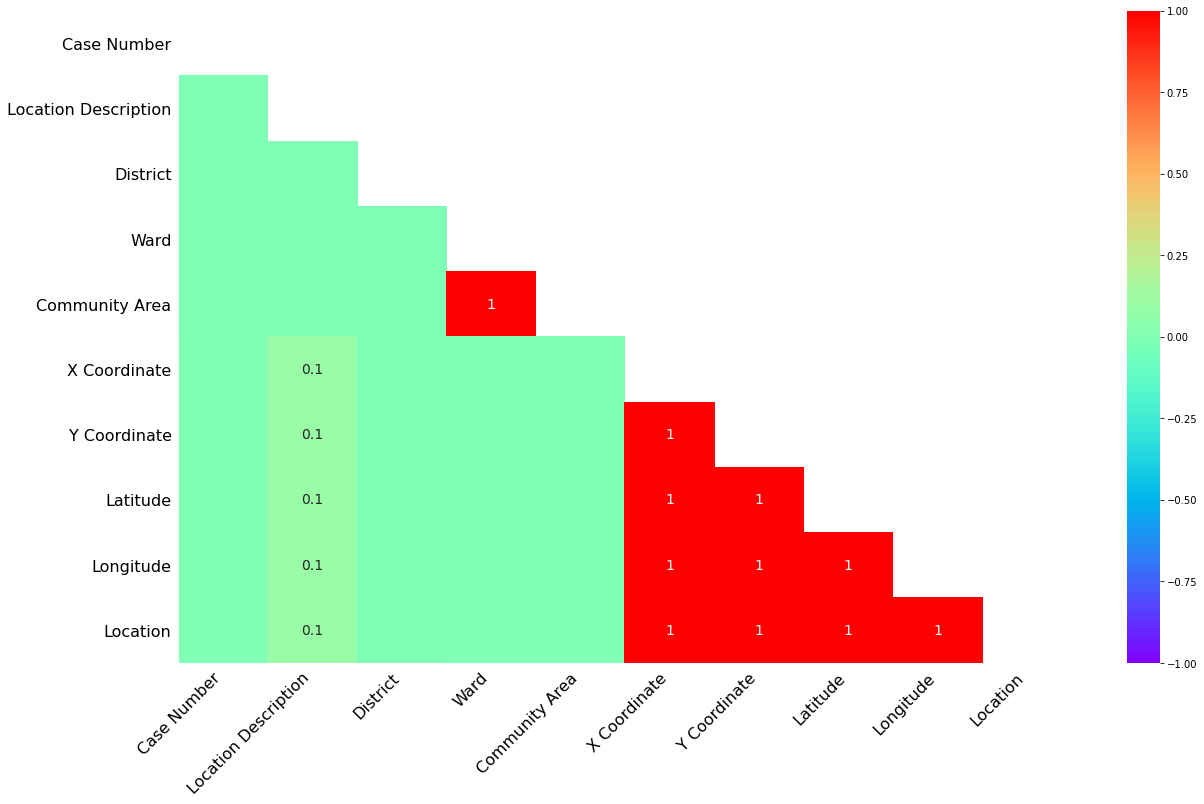

In [ ]:
msno.heatmap(df,cmap='rainbow')

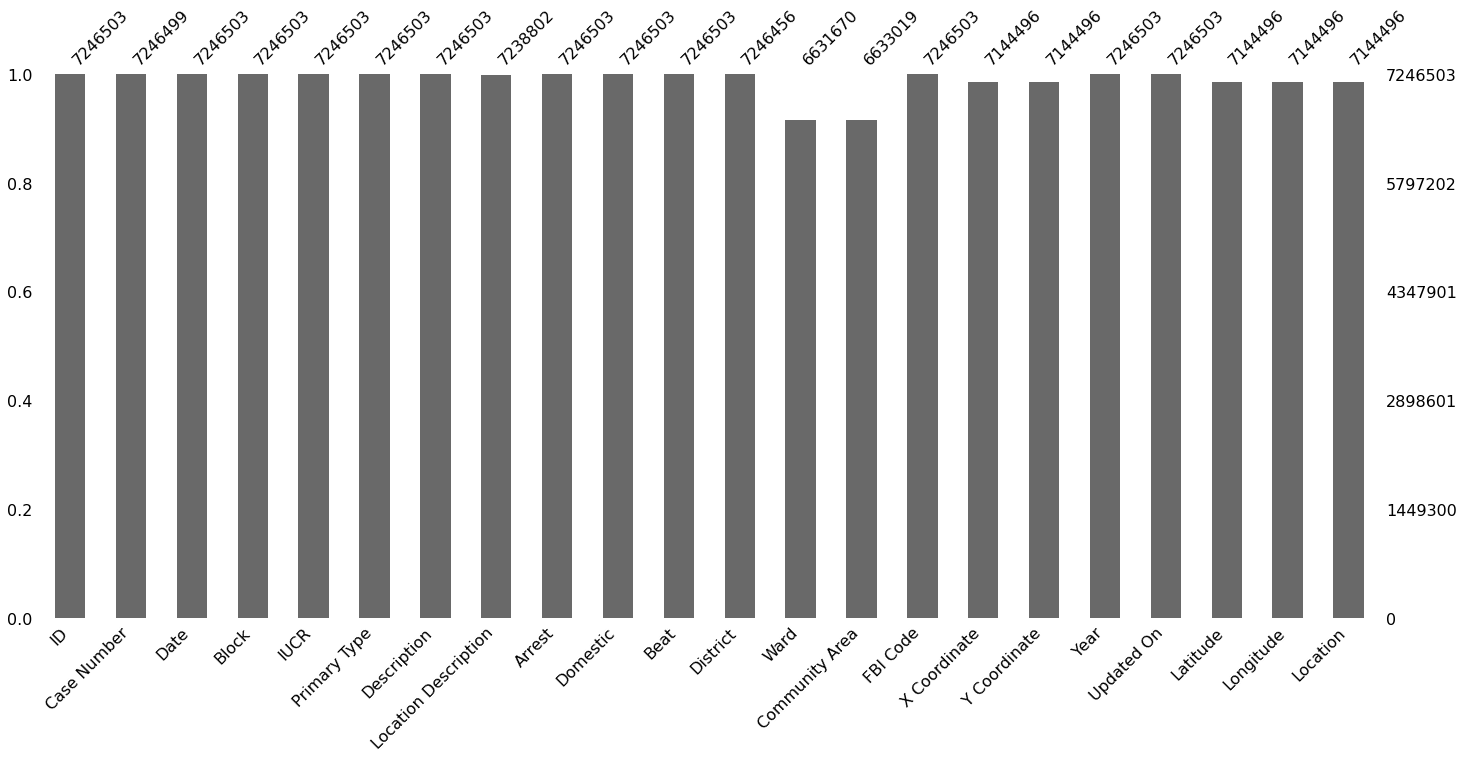

In [ ]:
msno.bar(df)

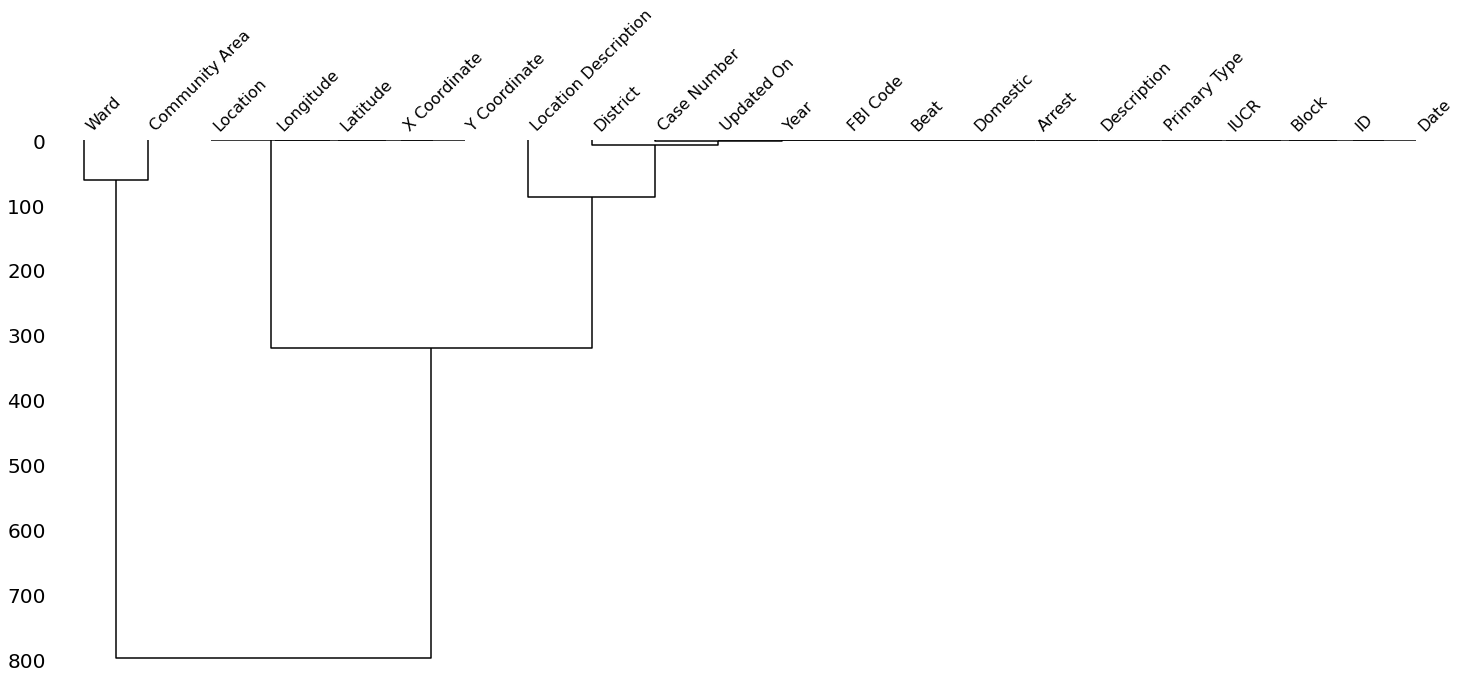

In [ ]:
msno.dendrogram(df)

# we can also visualize this using seaborn

In [ ]:
sns.heatmap()

ValueError: ignored

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df[[
        "ID",
        "IUCR",
        "Beat",
        "Case Number",
        "District",
        "Ward",
        "Updated On",
        "Year",
        "Community Area",
        "X Coordinate",
        "Y Coordinate",
        "Latitude",
        "Longitude",
        "Location",
        "FBI Code",
    ]], cbar = False, cmap = 'viridis')

In [ ]:
ax = sns.barplot(data=df)

KeyboardInterrupt: ignored

In [ ]:
import plotly.express as px
def plot_counts(serie, title):
    df = pd.DataFrame(serie.value_counts()[:15])
    df.columns = ["Freq"]
    df["Type"] = df.index
    fig = px.bar(df, y="Freq", x="Type", text="Freq", color="Freq")
    fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
    # fig.update_layout(uniformtext_minsize=8, uniformtext_mode="hide")
    fig.update_layout(title_text=title)
    fig.show()


plot_counts(df["Primary Type"], "Kind of Crimes")

In [ ]:
df=df.dropna()

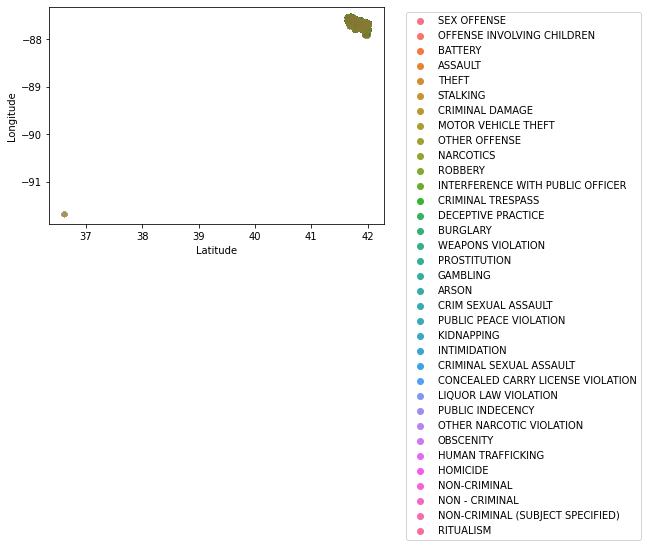

In [ ]:
# prime_counts=pd.DataFrame(df['Primary Type'].value_counts()[:15])
# df.plot(kind='scatter',
#        x='Longitude',
#        y='Latitude',
#        alpha=0.2,
#        s=prime_counts,
#        label='Primary Type',
#        figsize=(12,5),
#        cmap=plt.get_cmap('jet')
#        )
# sns.scatterplot(x='Longitude',
#                y='Latitude',
#                 alpha=0.2,
#                data=df)
sns.scatterplot(x='Latitude',
               y='Longitude',
                hue='Primary Type',
                alpha=0.01,
               data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [ ]:
df.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,4.0,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,22.0,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [ ]:
# create a dataframe with Homicide as the only crime

df_homicideN = df[df['Primary Type']=='HOMICIDE']

In [ ]:
df_homicide = df_homicideN.dropna()
df_homicide.isnull().sum().sum()

0

In [ ]:
keep_cols = ['Year','Date','Primary Type','Arrest','Domestic','District','Location Description',
             'FBI Code','X Coordinate','Y Coordinate','Latitude','Longitude','Location']

df_homicide = df_homicide[keep_cols].reset_index()
df_homicide.head()

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,74858,2019,05/27/2019 11:42:00 PM,HOMICIDE,True,False,8.0,PARKING LOT,01A,1145925.0,1847569.0,41.737710,-87.740958,"(41.737709752, -87.740958098)"
1,74979,2019,05/28/2019 12:25:00 AM,HOMICIDE,True,False,25.0,PARK PROPERTY,01A,1151758.0,1911886.0,41.914092,-87.717899,"(41.914092032, -87.717899225)"
2,74982,2019,05/28/2019 09:25:00 AM,HOMICIDE,True,False,25.0,STREET,01A,1136467.0,1907694.0,41.902876,-87.774177,"(41.902876025, -87.774176927)"
3,75084,2019,05/29/2019 02:24:00 PM,HOMICIDE,True,False,4.0,STREET,01A,1194656.0,1847614.0,41.736774,-87.562421,"(41.736774091, -87.562420599)"
4,75092,2019,05/29/2019 11:42:00 AM,HOMICIDE,False,False,7.0,STREET,01A,1164886.0,1866877.0,41.790314,-87.670945,"(41.790314426, -87.670944722)"


In [ ]:
# change string Date to datetime.datetime format
import datetime
df_homicide['Date'] = df_homicide['Date'].apply(lambda x: datetime.datetime.strptime(x,"%m/%d/%Y %I:%M:%S %p"))
df_homicide.head()

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,74858,2019,2019-05-27 23:42:00,HOMICIDE,True,False,8.0,PARKING LOT,01A,1145925.0,1847569.0,41.737710,-87.740958,"(41.737709752, -87.740958098)"
1,74979,2019,2019-05-28 00:25:00,HOMICIDE,True,False,25.0,PARK PROPERTY,01A,1151758.0,1911886.0,41.914092,-87.717899,"(41.914092032, -87.717899225)"
2,74982,2019,2019-05-28 09:25:00,HOMICIDE,True,False,25.0,STREET,01A,1136467.0,1907694.0,41.902876,-87.774177,"(41.902876025, -87.774176927)"
3,75084,2019,2019-05-29 14:24:00,HOMICIDE,True,False,4.0,STREET,01A,1194656.0,1847614.0,41.736774,-87.562421,"(41.736774091, -87.562420599)"
4,75092,2019,2019-05-29 11:42:00,HOMICIDE,False,False,7.0,STREET,01A,1164886.0,1866877.0,41.790314,-87.670945,"(41.790314426, -87.670944722)"


In [ ]:
# create new columns from date column -- Year, Month, Day, Hour, Minutes, DayOfWeek 

df_homicide['Year'] = df_homicide['Date'].dt.year
df_homicide['Month'] = df_homicide['Date'].dt.month
df_homicide['Day'] = df_homicide['Date'].dt.day
df_homicide['Weekday'] = df_homicide['Date'].dt.dayofweek
df_homicide['HourOfDay'] = df_homicide['Date'].dt.hour

df_homicide = df_homicide.sort_values('Date')
# print columns list and info

df_homicide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10410 entries, 10122 to 1829
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 10410 non-null  int64         
 1   Year                  10410 non-null  int64         
 2   Date                  10410 non-null  datetime64[ns]
 3   Primary Type          10410 non-null  object        
 4   Arrest                10410 non-null  bool          
 5   Domestic              10410 non-null  bool          
 6   District              10410 non-null  float64       
 7   Location Description  10410 non-null  object        
 8   FBI Code              10410 non-null  object        
 9   X Coordinate          10410 non-null  float64       
 10  Y Coordinate          10410 non-null  float64       
 11  Latitude              10410 non-null  float64       
 12  Longitude             10410 non-null  float64       
 13  Location     

Text(0.5, 1.0, 'HOMICIDE BY DAY OF THE WEEK -- All Years')

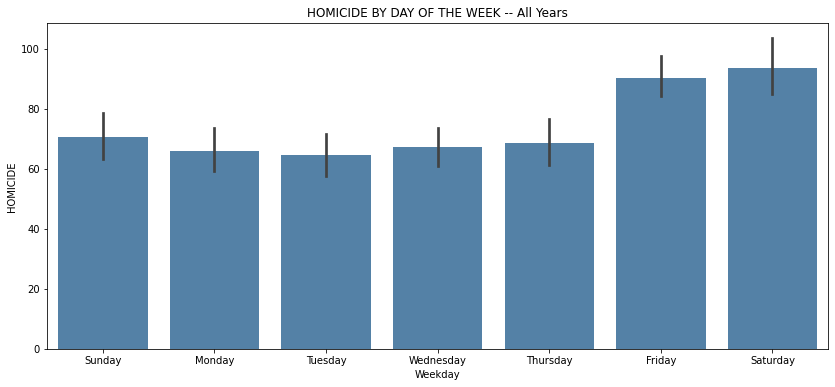

In [ ]:
# plot homicide rates vs. day of the week
fig, ax = plt.subplots(figsize=(14,6))
week_days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']    
fig = sns.barplot(x='Weekday',
                  y='HOMICIDE',
                  data=df_homicide.groupby(['Year','Weekday'])['Primary Type'].\
                       value_counts().unstack().reset_index(),
                  color='steelblue')
ax.set_xticklabels(week_days)
plt.title('HOMICIDE BY DAY OF THE WEEK -- All Years')

Text(0.5, 1.0, 'HOMICIDE BY HOUR OF THE DAY -- All Years')

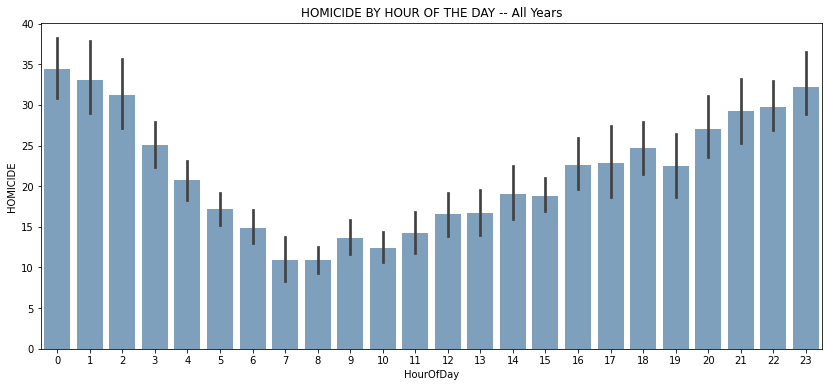

In [ ]:
# use seaborn barplot to plot homicides vs. hour of the day 
fig, ax = plt.subplots(figsize=(14,6))
fig = sns.barplot(x='HourOfDay',
                  y='HOMICIDE',
                  data=df_homicide.groupby(['Year','HourOfDay'])['Primary Type'].\
                       value_counts().unstack().reset_index(),
                  color='steelblue',
                  alpha=.75)
plt.title('HOMICIDE BY HOUR OF THE DAY -- All Years')